## HD 2039

Radial velocity data for HD2039 were obtained from Tinney et al.(2003).


Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data


We define a radial velocity model. It has 5 parameters: amplitude, period, eccentricity, longitude of periastron, phase since periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 1000.0, 0.0]
hilim = [200.0, 1500.0, 0.99]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )
print( mdl.npchain, mdl.npbase )
print( [mdl.getPrior(k).lowLimit for k in range( mdl.npchain )])



Polynomial: f( x:p ) = p_0 +
RadialVelocity 
6 1
[0.0, 0.0, 1000.0, 0.0, 0.0, 0.0]


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with with unknown scale
Moving the walkers with   GalileanEngine
Using no threads.
Iteration   logZ        H     LowL     npar    parameters
       0 -3571791828.8      4.6 -3571791824.2      7  [   92.195   74.282 1094.188    0.806    1.665 ...]


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.8-py3.5.egg/BayesicFitting/source/FixedModel.py:359: UserWarning: RadialVelocity has no partials defined; using numeric partials.


     100 -27681.3      5.6 -27675.7      7  [   73.646   71.936 1187.291    0.179    6.008 ...]
     200   -730.5      6.6   -723.9      7  [    1.960   94.253 1066.955    0.878    3.139 ...]
     300   -280.7      6.4   -273.5      7  [   77.817   50.685 1436.990    0.374    0.738 ...]
     400   -219.0      6.8   -211.5      7  [   48.555   41.722 1199.295    0.495    2.148 ...]
     500   -199.7      6.0   -192.8      7  [   26.312   69.163 1438.805    0.232    0.854 ...]
     600   -193.1      6.4   -185.7      7  [   12.629   10.538 1070.939    0.486    1.606 ...]
     700   -188.4      7.3   -180.0      7  [   42.525   53.897 1418.040    0.769    3.288 ...]
     800   -183.0      8.5   -173.5      7  [   17.766   37.283 1103.372    0.235    1.926 ...]
     900   -178.6      9.2   -168.1      7  [    0.860   54.701 1411.666    0.026    4.671 ...]
    1000   -173.8     10.2   -162.5      7  [   72.453  113.868 1222.728    0.558    4.046 ...]
    1100   -170.3     10.9   -158.0     

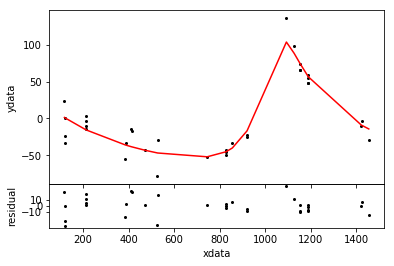

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, seed=1308 )
ns.verbose = 2
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )

# RadialVelocityModel has no partial. Numeric partials are used in stead.

In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( sl.scale ), fmt( sl.stdevScale ) )
print( evi )

[   62.053   80.793 1251.416    0.512    4.215    2.551]
[    8.226    4.655   32.152    0.026    0.164    0.098]
   15.099     2.348
-68.91385122742801


In [7]:
for s in sl :
    wt = math.exp( s.logW )
    print( "%2d %2d "%(s.id, s.parent), fmt(s.parameters), fmt(s.hypars), fmt(s.logL), fmt(s.logW), wt )

 0  8  [   92.195   74.282 1094.188    0.806    1.665 ...]     0.015  -3571791824.184  -3571791670.114 0.0
 1  0  [  120.527  118.297 1096.836    0.349    4.602 ...]     0.017  -2523874714.165  -2523874560.105 0.0
 2 17  [   10.191  131.562 1465.949    0.849    0.817 ...]     0.012  -916879319.559  -916879165.509 0.0
 3 21  [  123.393   90.977 1038.375    0.290    4.125 ...]     0.027  -869479144.942  -869478990.902 0.0
 4 30  [   84.852   25.034 1112.636    0.912    3.909 ...]     0.017  -789306334.279  -789306180.249 0.0
 5 47  [   37.854  131.223 1053.203    0.953    5.014 ...]     0.017  -786838932.818  -786838778.798 0.0
 6 67  [  152.339   11.541 1188.821    0.627    2.817 ...]     0.023  -701076825.601  -701076671.591 0.0
 7 51  [    3.239   34.654 1471.850    0.734    3.275 ...]     0.011  -686722865.989  -686722711.989 0.0
 8 88  [  186.288    2.516 1258.938    0.777    0.660 ...]     0.033  -568419492.964  -568419338.974 0.0
 9 51  [   15.420  141.531 1454.377    0.938    0.2

277 93  [  178.029   47.770 1290.592    0.900    5.381 ...]    79.342  -305.931  -154.631 6.993874767848194e-68
278 40  [   43.451  161.207 1435.886    0.191    3.525 ...]    50.413  -304.699  -153.409 2.3731904683970136e-67
279 18  [  193.006   18.425 1313.703    0.959    1.080 ...]    67.516  -303.128  -151.848 1.1301669372241367e-66
280 39  [   34.934  193.364 1258.749    0.599    4.981 ...]    30.763  -302.838  -151.568 1.4952109034633292e-66
281 61  [   29.788   64.274 1024.440    0.724    5.513 ...]    19.089  -297.493  -146.233 3.10339591244951e-64
282 35  [  133.624  150.021 1114.433    0.632    1.948 ...]    87.926  -294.936  -143.686 3.962265545275343e-63
283 71  [  101.045   11.829 1261.129    0.539    0.024 ...]    35.195  -292.097  -140.858 6.7039299627665854e-62
284  0  [  191.513    7.336 1110.395    0.196    6.084 ...]    75.907  -291.593  -140.364 1.0986410270866046e-61
285 16  [  156.584   97.158 1026.712    0.892    2.816 ...]    48.619  -291.384  -140.165 1.34068055

471 49  [   44.459    9.070 1308.879    0.249    4.026 ...]    87.311  -194.936   -45.576 1.6083767797917993e-20
472 72  [  115.214  144.905 1429.451    0.439    4.131 ...]    84.843  -194.897   -45.547 1.6558748269426582e-20
473 83  [   42.076   46.044 1236.445    0.581    5.163 ...]    91.036  -194.886   -45.546 1.6574292007727763e-20
474 77  [   47.511    8.268 1054.519    0.230    5.883 ...]    94.196  -194.802   -45.472 1.7859500528770478e-20
475  5  [   55.154   47.145 1244.229    0.445    4.378 ...]    96.507  -194.800   -45.480 1.7711229691063263e-20
476 33  [   62.470  141.554 1490.483    0.410    4.102 ...]    68.077  -194.657   -45.347 2.0232601827930452e-20
477 62  [   96.478   97.929 1486.407    0.569    0.775 ...]    76.233  -194.555   -45.255 2.218511252256619e-20
478 47  [   49.643   22.764 1055.879    0.357    1.144 ...]    74.741  -194.430   -45.140 2.4882603183613266e-20
479 39  [   45.389   11.144 1350.521    0.151    3.765 ...]    83.508  -194.273   -44.993 2.88211

638 53  [    2.151   35.901 1415.863    0.818    1.440 ...]    43.041  -183.276   -35.586 3.5083158426640125e-16
639 63  [   36.949   63.054 1492.190    0.032    4.829 ...]    47.440  -183.108   -35.428 4.1076997385563446e-16
640 38  [   38.218   59.834 1474.684    0.083    5.149 ...]    52.369  -183.087   -35.418 4.1529902380088473e-16
641 52  [   30.123   61.823 1489.166    0.065    5.349 ...]    46.478  -183.026   -35.366 4.3716060359559106e-16
642  0  [    7.841    3.937 1132.492    0.149    2.173 ...]    42.442  -182.841   -35.191 5.210365456597271e-16
643 35  [    1.709    4.409 1357.328    0.508    0.223 ...]    64.786  -182.737   -35.097 5.723234846853902e-16
644 79  [   45.102  105.805 1165.531    0.316    3.067 ...]    50.561  -182.696   -35.066 5.901708974454725e-16
645 20  [    2.980    8.598 1122.743    0.172    2.661 ...]    45.583  -182.690   -35.070 5.878453051838517e-16
646 35  [    9.536    6.433 1189.277    0.090    2.383 ...]    51.995  -182.639   -35.029 6.12209423

804 29  [   22.746   30.559 1329.343    0.345    4.344 ...]    21.194  -173.078   -27.048 1.7915623180987926e-12
805  9  [   43.585   58.054 1320.057    0.343    4.334 ...]    20.293  -173.016   -26.996 1.88655507902556e-12
806 14  [   30.296   28.550 1168.838    0.350    3.486 ...]    49.954  -173.013   -27.003 1.8736393361627233e-12
807 37  [    4.581   22.559 1240.824    0.113    2.959 ...]    42.095  -172.854   -26.854 2.173966067385077e-12
808 35  [   15.321   30.989 1028.955    0.198    2.711 ...]    39.772  -172.676   -26.686 2.573596202420629e-12
809 94  [   30.341   43.445 1421.190    0.753    3.752 ...]    43.248  -172.661   -26.681 2.5862708457472182e-12
810 34  [   53.580   57.795 1419.326    0.744    4.259 ...]    24.843  -172.619   -26.649 2.66967536949979e-12
811 25  [   47.788   66.052 1269.611    0.397    3.120 ...]    53.270  -172.608   -26.648 2.6720540893300964e-12
812 10  [   10.688   32.239 1026.170    0.141    3.464 ...]    37.588  -172.585   -26.635 2.7082490093

971 23  [   10.057   57.130 1462.518    0.100    4.470 ...]    30.281  -163.849   -19.489 3.436977139971616e-09
972 15  [   10.957   56.103 1461.411    0.097    4.500 ...]    32.172  -163.782   -19.433 3.6350108707507564e-09
973 38  [   50.379   52.833 1199.639    0.419    3.844 ...]    31.551  -163.771   -19.431 3.6410157010373426e-09
974 97  [   53.522   70.010 1295.893    0.351    4.020 ...]    20.330  -163.651   -19.321 4.065672206580151e-09
975 47  [   51.088   69.267 1285.021    0.336    4.080 ...]    19.439  -163.568   -19.248 4.373509698348367e-09
976 11  [   48.128   68.292 1293.166    0.367    3.568 ...]    21.753  -163.566   -19.256 4.337249514998663e-09
977 55  [   58.681   73.760 1096.462    0.595    2.909 ...]    20.561  -163.524   -19.224 4.477541273366712e-09
978 29  [    1.874   61.830 1195.761    0.305    3.618 ...]    28.943  -163.498   -19.208 4.5514857630210246e-09
979  3  [   19.238   71.627 1162.712    0.401    4.001 ...]    32.025  -163.381   -19.101 5.062920122

1137  3  [   25.094   77.936 1249.295    0.398    4.583 ...]    18.112  -156.305   -13.605 1.2346192099809934e-06
1138 73  [   73.822   88.795 1169.676    0.513    3.617 ...]    34.298  -156.199   -13.509 1.358176139561949e-06
1139  8  [   40.628   81.564 1300.121    0.440    4.601 ...]    17.507  -156.167   -13.488 1.388172089011822e-06
1140 53  [   75.508   62.245 1314.655    0.742    4.200 ...]    19.238  -156.097   -13.427 1.474974998646651e-06
1141  4  [   62.982   67.129 1362.488    0.583    4.521 ...]    13.486  -156.093   -13.433 1.4662346377911705e-06
1142 83  [   62.533   71.800 1192.641    0.448    4.125 ...]    24.665  -156.069   -13.419 1.4866185956560847e-06
1143 76  [   66.212  117.617 1397.068    0.647    5.159 ...]    25.967  -156.059   -13.419 1.486680730632991e-06
1144 74  [   38.423   68.209 1342.610    0.324    4.304 ...]    17.707  -156.038   -13.408 1.5029571942600213e-06
1145 78  [   54.605   86.373 1234.480    0.393    4.333 ...]    31.056  -156.022   -13.402 1

1304 61  [   42.963   79.448 1316.517    0.424    4.529 ...]    14.004  -150.542    -9.512 7.395444711184053e-05
1305 55  [   70.890   93.759 1162.700    0.503    3.703 ...]    25.898  -150.507    -9.487 7.585355689718073e-05
1306 79  [   33.036   73.853 1308.870    0.437    4.318 ...]    22.260  -150.484    -9.474 7.681698548798667e-05
1307 12  [   35.877   65.985 1358.789    0.366    4.520 ...]    20.392  -150.477    -9.478 7.655091850719998e-05
1308 56  [   62.738   66.136 1362.945    0.572    4.428 ...]    12.347  -150.473    -9.483 7.61197614460801e-05
1309 22  [   34.525   70.316 1324.186    0.379    4.479 ...]    15.083  -150.409    -9.430 8.031550285776988e-05
1310 42  [   61.249   80.866 1299.003    0.495    4.525 ...]    24.416  -150.389    -9.419 8.113615766639602e-05
1311 95  [   47.655   92.540 1212.544    0.407    4.193 ...]    21.139  -150.355    -9.395 8.31575768278372e-05
1312  8  [   37.020   66.701 1271.768    0.425    4.390 ...]    16.589  -150.334    -9.385 8.40139

1554 73  [   41.551   70.908 1243.339    0.448    4.242 ...]    20.758  -145.969    -7.439 0.0005879950651899885
1555 24  [   48.972   76.934 1272.563    0.519    4.440 ...]    16.724  -145.962    -7.442 0.0005858763225536163
1556 24  [   59.745   72.602 1281.793    0.512    4.267 ...]    11.169  -145.957    -7.447 0.000583184166634277
1557  5  [   60.333   90.789 1201.473    0.519    4.034 ...]    18.266  -145.940    -7.440 0.0005872921864865879
1558 86  [   54.749   79.271 1332.567    0.506    4.588 ...]    20.182  -145.936    -7.446 0.00058393387225838
1559 93  [   59.401   72.932 1279.142    0.512    4.261 ...]    11.071  -145.877    -7.397 0.000613118248019823
1560 26  [   53.037   76.572 1306.415    0.484    4.622 ...]    19.269  -145.869    -7.399 0.0006117043167387933
1561 73  [   37.023   70.278 1200.232    0.433    4.002 ...]    18.956  -145.859    -7.399 0.0006118645529043359
1562 89  [   38.994   77.297 1242.258    0.429    4.145 ...]    18.347  -145.836    -7.387 0.0006194

1720 13  [   69.618   81.960 1246.372    0.527    4.150 ...]    12.643  -143.385    -6.515 0.0014814020973898882
1721 84  [   59.655   88.418 1215.370    0.491    4.173 ...]    19.217  -143.376    -6.516 0.00148005851282571
1722 98  [   67.899   77.942 1220.523    0.518    4.116 ...]    13.690  -143.371    -6.521 0.0014716413708365074
1723 23  [   68.459   81.384 1238.315    0.520    4.227 ...]    12.253  -143.344    -6.505 0.0014965196893423059
1724 36  [   56.568   83.823 1266.855    0.526    4.350 ...]    16.013  -143.337    -6.507 0.0014924843083268322
1725 72  [   58.880   85.340 1255.539    0.486    4.306 ...]    18.017  -143.329    -6.509 0.0014892403253708476
1726 16  [   65.610   87.809 1234.556    0.518    4.108 ...]    14.384  -143.327    -6.517 0.001478140165312903
1727 21  [   65.643   86.917 1193.563    0.534    3.919 ...]    13.941  -143.325    -6.525 0.0014662993547528446
1728 11  [   67.624   74.219 1259.797    0.534    4.216 ...]    13.130  -143.277    -6.487 0.001523

1887 62  [   67.330   86.226 1225.911    0.515    4.151 ...]    14.522  -141.451    -6.252 0.0019274320086734287
1888 85  [   68.011   81.366 1254.577    0.527    4.135 ...]    12.321  -141.451    -6.261 0.0019087999338677308
1889 96  [   54.180   78.723 1265.758    0.489    4.303 ...]    15.157  -141.447    -6.267 0.001898350440301745
1890 92  [   60.609   79.553 1270.375    0.533    4.336 ...]    16.751  -141.436    -6.267 0.0018986818507444661
1891 71  [   69.635   79.186 1252.070    0.529    4.092 ...]    12.263  -141.436    -6.276 0.0018804483909986586
1892 65  [   67.533   83.855 1217.966    0.532    3.996 ...]    12.906  -141.435    -6.285 0.001863550072184458
1893 71  [   63.530   78.815 1290.191    0.529    4.364 ...]    12.658  -141.431    -6.292 0.001851887117438031
1894 49  [   63.509   78.864 1290.425    0.529    4.366 ...]    12.657  -141.418    -6.288 0.001858250870769877
1895 69  [   59.761   82.849 1244.027    0.525    4.143 ...]    16.228  -141.412    -6.292 0.0018507

2054 55  [   67.286   80.041 1252.136    0.529    4.155 ...]    13.036  -140.290    -6.760 0.0011589996997881829
2055 55  [   65.833   81.238 1259.292    0.520    4.263 ...]    14.836  -140.290    -6.770 0.0011480753435380616
2056 85  [   64.695   82.748 1255.578    0.524    4.233 ...]    14.931  -140.276    -6.766 0.0011517401170023259
2057 11  [   62.908   78.385 1237.699    0.521    4.172 ...]    14.589  -140.275    -6.775 0.0011415356075716112
2058 18  [   67.927   84.209 1221.938    0.522    4.032 ...]    14.626  -140.265    -6.775 0.0011420276571528067
2059 53  [   67.359   80.728 1248.128    0.521    4.207 ...]    14.128  -140.261    -6.781 0.001135297903365383
2060 50  [   66.016   82.785 1227.061    0.523    4.037 ...]    13.795  -140.251    -6.781 0.001135319846582801
2061  0  [   67.323   87.091 1238.091    0.521    4.156 ...]    14.207  -140.251    -6.791 0.0011241359526254137
2062 63  [   68.855   84.248 1251.343    0.527    4.180 ...]    15.043  -140.243    -6.793 0.00112

2303 96  [   69.137   84.096 1254.951    0.526    4.209 ...]    14.544  -139.513    -8.473 0.00020897987245609617
2304 68  [   68.910   81.931 1248.357    0.524    4.154 ...]    15.448  -139.512    -8.482 0.00020713073164637088
2305 41  [   68.900   85.612 1234.162    0.533    4.133 ...]    15.421  -139.512    -8.492 0.00020515200360574502
2306 44  [   69.052   84.070 1246.533    0.524    4.184 ...]    15.402  -139.511    -8.502 0.00020315839822242373
2307 80  [   68.010   84.591 1253.045    0.528    4.200 ...]    14.980  -139.511    -8.511 0.00020120469493411478
2308 95  [   71.135   84.296 1257.143    0.533    4.231 ...]    16.172  -139.510    -8.521 0.00019932778428929628
2309 74  [   68.832   83.863 1253.399    0.526    4.236 ...]    14.579  -139.508    -8.528 0.00019783492984151005
2310 58  [   69.500   81.774 1248.729    0.526    4.188 ...]    15.377  -139.508    -8.538 0.0001958811703015831
2311 52  [   67.467   79.933 1252.767    0.527    4.171 ...]    14.461  -139.501    -8.54

2503  1  [   68.883   79.744 1247.479    0.533    4.135 ...]    14.052  -139.247   -10.207 3.6923195074314834e-05
2504 84  [   68.358   78.747 1234.031    0.536    4.032 ...]    13.753  -139.245   -10.215 3.660931633785553e-05
2505 86  [   69.869   81.088 1230.662    0.535    4.023 ...]    14.409  -139.243   -10.223 3.633548919868187e-05
2506 25  [   67.191   82.654 1229.256    0.537    4.096 ...]    13.680  -139.242   -10.232 3.6007703119781225e-05
2507  7  [   68.435   79.712 1234.500    0.536    4.041 ...]    13.453  -139.239   -10.239 3.573165764133516e-05
2508 13  [   68.009   80.491 1256.207    0.539    4.199 ...]    15.665  -139.239   -10.249 3.5382276818270456e-05
2509 62  [   67.382   79.547 1236.712    0.531    4.090 ...]    13.799  -139.237   -10.257 3.510455885750654e-05
2510 56  [   67.385   81.425 1236.393    0.533    4.102 ...]    13.318  -139.237   -10.267 3.476742427716494e-05
2511  2  [   67.634   81.691 1240.354    0.531    4.107 ...]    15.363  -139.236   -10.276 3.

2637 34  [   68.699   79.942 1260.625    0.540    4.220 ...]    14.436  -139.135   -11.435 1.081087681816532e-05
2638 86  [   70.496   79.060 1214.203    0.547    3.937 ...]    15.464  -139.132   -11.442 1.0738219606151999e-05
2639 33  [   69.434   79.524 1238.073    0.535    4.058 ...]    14.272  -139.131   -11.452 1.0632552439895955e-05
2640  5  [   68.432   78.999 1233.414    0.537    4.039 ...]    13.753  -139.130   -11.461 1.0536998757474772e-05
2641 13  [   69.902   82.488 1250.173    0.535    4.174 ...]    15.317  -139.130   -11.470 1.0434876130501158e-05
2642 63  [   70.253   82.163 1251.557    0.534    4.175 ...]    15.400  -139.129   -11.480 1.033959337975254e-05
2643 74  [   70.678   83.727 1246.640    0.534    4.168 ...]    15.466  -139.129   -11.489 1.0240589093279337e-05
2644 63  [   70.711   81.251 1209.098    0.550    3.952 ...]    15.094  -139.126   -11.496 1.0165882113893683e-05
2645 52  [   68.082   83.633 1235.366    0.531    4.137 ...]    14.637  -139.125   -11.505

2803 52  [   68.013   81.314 1233.441    0.535    4.091 ...]    13.829  -139.003   -12.963 2.3457240342324957e-06
2804 35  [   69.545   81.005 1244.441    0.536    4.117 ...]    14.986  -139.002   -12.973 2.323266832144173e-06
2805 96  [   69.130   81.822 1245.337    0.536    4.163 ...]    14.387  -139.001   -12.982 2.3024308555154094e-06
2806 85  [   69.952   82.658 1247.260    0.535    4.146 ...]    14.727  -139.001   -12.991 2.28027942589216e-06
2807 16  [   70.371   81.865 1211.560    0.548    3.961 ...]    15.205  -139.001   -13.001 2.257675919100292e-06
2808 82  [   69.818   82.957 1235.840    0.543    4.092 ...]    13.163  -139.000   -13.010 2.2378928470993004e-06
2809 24  [   67.846   81.735 1233.235    0.535    4.083 ...]    13.914  -138.999   -13.020 2.2164405108077525e-06
2810 62  [   68.740   83.089 1231.995    0.539    4.111 ...]    14.052  -138.999   -13.029 2.1964040849418547e-06
2811 32  [   69.075   81.462 1262.670    0.540    4.234 ...]    14.560  -138.998   -13.039 2

2970 35  [   68.576   81.404 1238.244    0.536    4.127 ...]    14.605  -138.921   -14.551 4.793744030166037e-07
2971 56  [   68.961   82.027 1233.529    0.540    4.110 ...]    14.499  -138.920   -14.560 4.751029747925749e-07
2972 94  [   73.313   82.076 1213.720    0.555    3.943 ...]    12.852  -138.919   -14.569 4.7053899514748795e-07
2973 69  [   71.100   82.065 1211.779    0.548    3.955 ...]    15.145  -138.919   -14.579 4.659535159648155e-07
2974 52  [   71.956   82.721 1212.215    0.550    3.952 ...]    15.628  -138.919   -14.589 4.613434903399172e-07
2975 28  [   73.051   81.477 1223.311    0.554    4.036 ...]    13.966  -138.919   -14.599 4.56895085034087e-07
2976 30  [   70.662   82.256 1236.563    0.533    4.094 ...]    13.981  -138.918   -14.608 4.5254042451031173e-07
2977 59  [   70.104   82.565 1244.128    0.534    4.162 ...]    14.484  -138.918   -14.618 4.481018292616932e-07
2978 27  [   71.683   80.761 1209.023    0.544    3.934 ...]    15.099  -138.918   -14.628 4.43

3220 72  [   72.174   80.695 1214.691    0.555    3.951 ...]    14.197  -138.655   -16.785 5.1338977692321516e-08
3221 33  [   76.469   86.321 1236.777    0.563    4.129 ...]    15.955  -138.650   -16.790 5.1067604708067594e-08
3222 11  [   73.880   82.404 1223.223    0.551    3.997 ...]    13.051  -138.648   -16.798 5.067489440551612e-08
3223 30  [   78.646   86.119 1223.497    0.557    4.103 ...]    14.594  -138.646   -16.807 5.023048302850233e-08
3224 67  [   77.275   87.550 1241.967    0.562    4.170 ...]    15.949  -138.646   -16.816 4.9773608002061023e-08
3225 51  [   79.549   86.800 1223.860    0.554    4.058 ...]    15.101  -138.645   -16.825 4.930954336379967e-08
3226 52  [   72.589   81.987 1231.118    0.549    4.031 ...]    13.948  -138.643   -16.833 4.892712008254845e-08
3227 27  [   71.848   81.120 1216.001    0.554    3.942 ...]    14.472  -138.639   -16.839 4.8622328144266184e-08
3228 67  [   81.140   88.979 1233.928    0.550    4.095 ...]    15.260  -138.638   -16.848 4

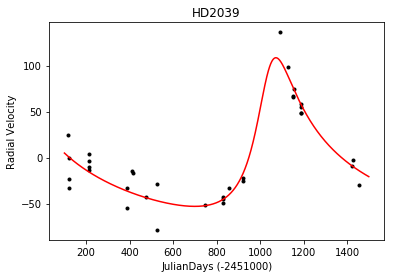

In [8]:
plt.plot( jd, rv, 'k. ' )
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.show()